In [1]:
import json
import pandas as pd

In [2]:
with open("/mnt/data/upcast/data/arxpr_simplified.json", "r") as f:
    json_file = json.load(f)
print(len(json_file))

14844


In [3]:
for key in json_file:
    fields = list(json_file[key].keys())
    break
fields


['developmental_stage_0',
 'strain_1',
 'sex_2',
 'cell_type_3',
 'hardware_4',
 'organism_part_5',
 'software_6',
 'assay_count_7',
 'age_8',
 'type_9',
 'experimental_designs_10',
 'title_11',
 'releasedate_12',
 'sample_count_13',
 'assay_by_molecule_14',
 'technology_15',
 'organism_16',
 'organism_17',
 'study_type_18',
 'name_19',
 'experimental_factors_20',
 'type_21',
 'no._of_samples_22',
 'no._of_samples_23']

In [4]:
dfs = {}
for field in fields:
    df = []

    for key in json_file:
        for element in json_file[key][field]:
            df.append({
                "id": key,
                "value" : element["value"],
                "ont" : None if element["ontology"] is None else element["ontology"][0],
                "ont_term" : None if element["ontology"] is None else element["ontology"][1],
                })
    df = pd.DataFrame(df)
    if not df.nunique()["ont_term"]:
        df = df[["id", "value"]]
    dfs[field] = df

In [5]:
from collections import Counter
from matplotlib import pyplot as plt

In [6]:
for field, n in [
    ("experimental_factors_20", 10),
    ("study_type_18", 25),
    ("type_21", 50),
]:
    commons = Counter(dfs[field]["value"]).most_common(n)
    print([c[0] for c in commons])

['genotype', 'treatment', 'time', 'cell type', 'organism part', 'compound', 'cell line', 'age', 'sex', 'dose']
['transcription profiling by array', 'rna-seq of coding rna', 'chip-seq', 'rna-seq of non coding rna', 'comparative genomic hybridization by array', 'other', 'methylation profiling by array', 'chip-chip by tiling array', 'methylation profiling by high throughput sequencing', 'unknown experiment type', 'chip-chip by array', 'genotyping by array', 'microrna profiling by array', 'transcription profiling by tiling array', 'rna-seq of coding rna from single cells', 'dna-seq', 'transcription profiling by rt-pcr', 'cell line - high-throughput sequencing', 'animal - high-throughput sequencing', 'proteomic profiling by array', 'transcription profiling by sage', 'high-throughput sequencing', 'baseline', 'atac-seq', 'rnai profiling by array']
['bioassay data transformation', 'normalization data transformation protocol', 'nucleic acid extraction', 'feature extraction', 'labeling', 'hybrid

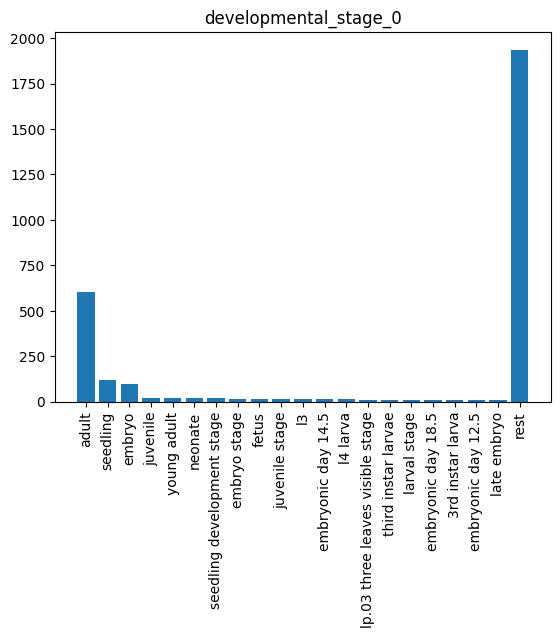

Field name: developmental_stage_0
Select values: [('adult', 605), ('l3 larva', 6), ('stage 3 of female gonad development', 3), ('76 days after transplanting', 3), ('3 hr schistosomulum', 2), ('nf stage 08', 2), ('sporophyte development stage', 2), ('larvae l3 (light gut stage)', 1), ('early floral stage 9 to 11', 1), ('one-cell embryo', 1), ('0-2 h embryo', 1), ('two days after appearance of fourth leaf', 1), ('early trophozoite', 1), ('stage 9', 1), ('48 hpf', 1), ('2-3 leaf pair', 1), ('24-26 hpf embryo', 1), ('55 days after transplanting', 1), ('embryonic day 15', 1), ('pber (adult stage)', 1), ('mid-l4', 1), ('neural progenitor cells', 1), ('4-6 days old adult females', 1), ('after tetrad stage, but before mature pollen grains', 1), ('carnegie stage 16', 1), ('embryonic', 1), ('post natal day 60 (adult)', 1), ('6 day after differentiation', 1), ('m', 1), ('dome', 1)]
Number of values: 2987
number of datasets with this field:    1716
number of unique values:               1368
dtype

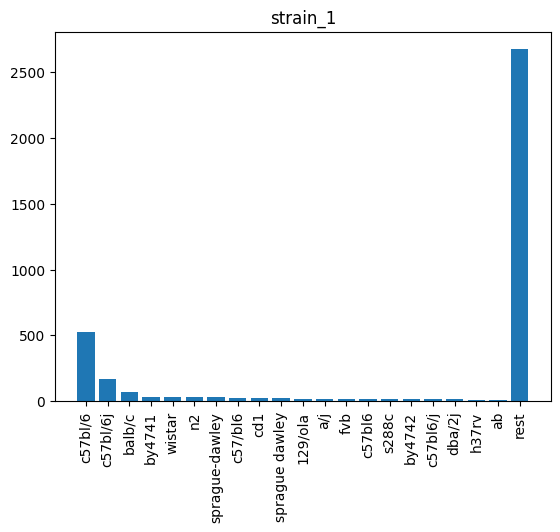

Field name: strain_1
Select values: [('c57bl/6', 526), ('nmri', 4), ('c57/b6-129svjae', 3), ('... 22 other values', 2), ('clinical isolate 1797-03 eai in activated macrophages', 2), ('atcc46645', 2), ('129 x castaneus', 1), ('sb2000.1', 1), ('csh50', 1), ('ah2258', 1), ('sy270-1', 1), ('zky428: cen.pk mata gcn5-flag::natmx, set1-3ha::kanmx34', 1), ('bdf1 hybrid', 1), ('sor55', 1), ('cd1, wild-type', 1), ('tu18 cl1', 1), ('70-15', 1), ('jb1', 1), ('hs959', 1), ('ju1927', 1), ('b938', 1), ('yjl7562', 1), ('c57bl/6nhsd', 1), ('nih/swiss', 1), ('r1 15', 1), ('l2-63', 1), ('ydp183', 1), ('mir-124', 1), ('mssa476', 1), ('spt999a', 1)]
Number of values: 3819
number of datasets with this field:    2305
number of unique values:               2027
dtype: int64
######################################################################################################################################################


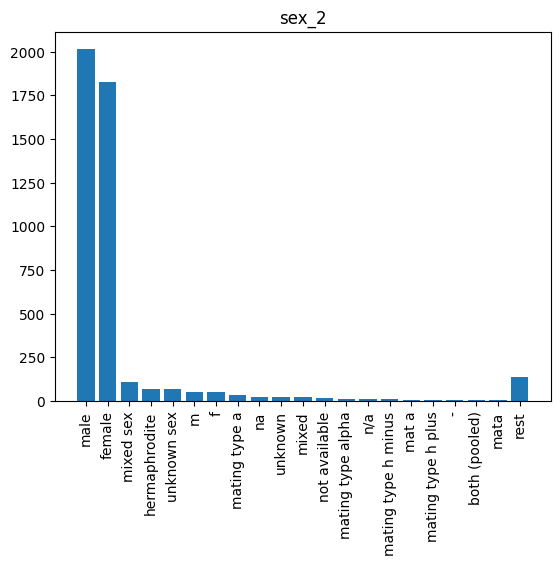

Field name: sex_2
Select values: [('male', 2014), ('unknown sex', 70), ('na', 23), ('mating type alpha', 14), ('mating type h plus', 6), ('h-', 5), ('woman', 4), ('mating type h-', 3), ('not specified', 2), ('pooled male and female', 2), ('"female"', 2), ('girl', 2), ('not applicable', 2), ('femal', 2), ('9 females and 7 males', 1), ('male (gfp negative)', 1), ('male-intact', 1), ('other: rna of one male and one female mouse', 1), ('2', 1), ('mixed (2 female, 1 male)', 1), ('12 males', 1), ('gilt', 1), ('ni', 1), ('castrated male', 1), ('anonymized', 1), ('h+', 1), ('mc', 1), ('monoicious', 1)]
Number of values: 4525
number of datasets with this field:    3024
number of unique values:                111
dtype: int64
######################################################################################################################################################


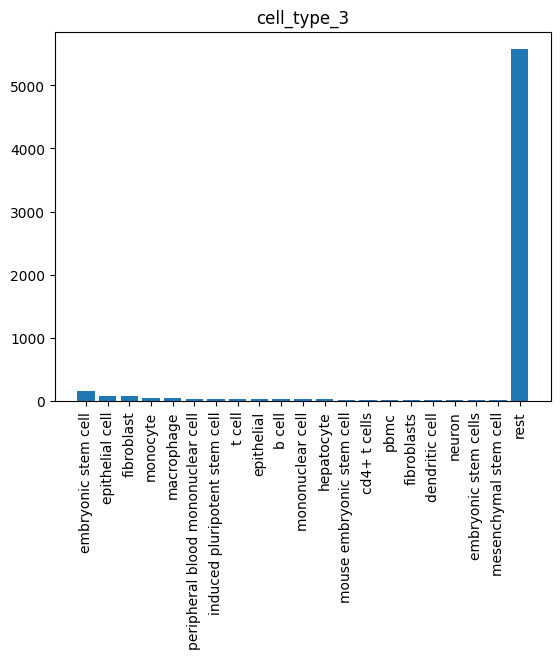

Field name: cell_type_3
Select values: [('embryonic stem cell', 165), ('cd14+ monocytes', 5), ('t47d', 4), ('hematopoietic cell', 3), ('human peripheral blood mononuclear cells', 2), ('lineage negative, ckit+, sca1+ foetal liver cells from e13.5 embryo', 2), ('fetal fibroblast', 2), ('ute-ips-4, passage 27', 2), ('human embryonic fibroblast', 1), ('megakaryocytes', 1), ('bone marrow derived gr1dim mac1+ granulocytic progenitor cells', 1), ('primary memory cd8 t cells', 1), ('non-tumor liver', 1), ('cd34-lc', 1), ('cd19', 1), ('splenocytes', 1), ('human telomerase-immortalised retinal pigmented epithelial cells', 1), ('cd45+ hdmec-rec-hmpp', 1), ('lf-ips cells', 1), ('t cell acute lymphoblastic leukemia cells (t-all)', 1), ('lineage-c-kit+sca-1+cd34-', 1), ('mrc-5', 1), ('lgr6-negative hair follicle/sebaceous gland cell', 1), ('hoxa9/meis1(a9m)-transformed hematopoietic stem and progenitor cell', 1), ('cord blood cd34+ cell', 1), ('normal human lung fibroblast', 1), ('insm1-expressing/p

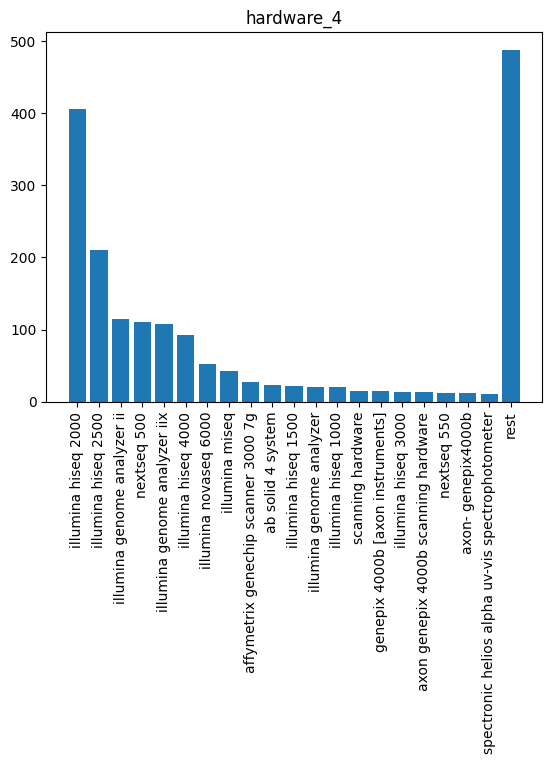

Field name: hardware_4
Select values: [('illumina hiseq 2000', 406), ('illumina hiseq 1500', 22), ('illumina hiscansq', 10), ('affymetrix whole transcript', 5), ('-', 4), ('chemostat', 4), ('ribozero', 3), ('genepix 4000b', 3), ('10x machine', 2), ('other', 2), ('agilent�s microarray hybridization oven', 2), ('gene titan', 2), ('10x genomics chromium', 1), ('agilent dna microarray scanner g2565ca', 1), ('low input quick amp labeling kit (agilent technologies), nd-1000 spectrophotometer (nanodrop technologies), bioanalyser system (agilent technologies)', 1), ('sonifier', 1), ('iridis 4 high performance computing cluster', 1), ('illumina bead array reader', 1), ('wild m8 zoom stereomicroscope (wild heerbrugg, switzerland)', 1), ('the genechip instrument system', 1), ('(make:affymetrix scanner,model:)', 1), ('eppendorf epmotion 5073m pipetting robot', 1), ('genepix 4000b scanner', 1), ('bgiseq-500', 1), ('affymetrix hybridisation oven', 1), ('generation iii array scanner [amersham]', 1), 

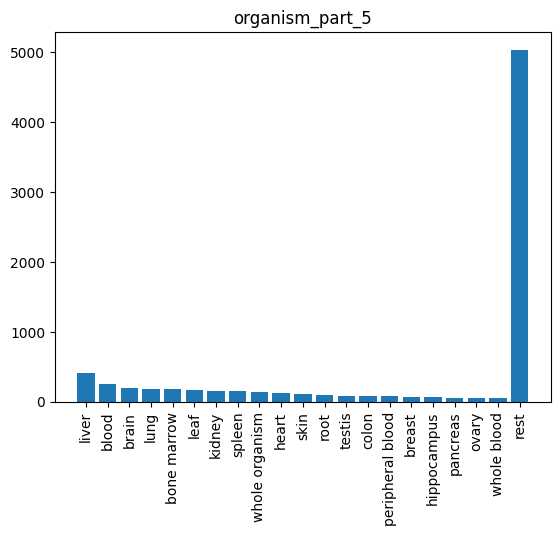

Field name: organism_part_5
Select values: [('liver', 415), ('seedling', 12), ('medial prefrontal cortex', 5), ('cerebellar cortex', 4), ('brain occipital', 3), ('vermiform appendix', 2), ('endocervix', 2), ('vegetative mycelium', 2), ('biliary system', 2), ('mouse tumorgraft from metastasis, cohort 1', 2), ('tricep muscle', 1), ('cribriform tumor', 1), ('prefrontal cortex area 9', 1), ('peripheral serum', 1), ('normal kidney', 1), ('normal renal cortex', 1), ('potato tuber 3rd stage (pt3)', 1), ('chorion', 1), ('er+ breast cancer primary tumor', 1), ('human pancreatic tumor', 1), ('young spikelets with the phase 7-9 at the middle of main panicles', 1), ('principal and basal cells of epididymis', 1), ('non-gut tissues (everything minus gut)', 1), ('uninvolved mammary tissue', 1), ('egg chamber', 1), ('fibroblast', 1), ('metastasis biopsy, liver', 1), ('endometrioma ectopic', 1), ('mix of heart, liver, spleen, kidney, brain', 1), ('silique fruit', 1)]
Number of values: 7781
number of da

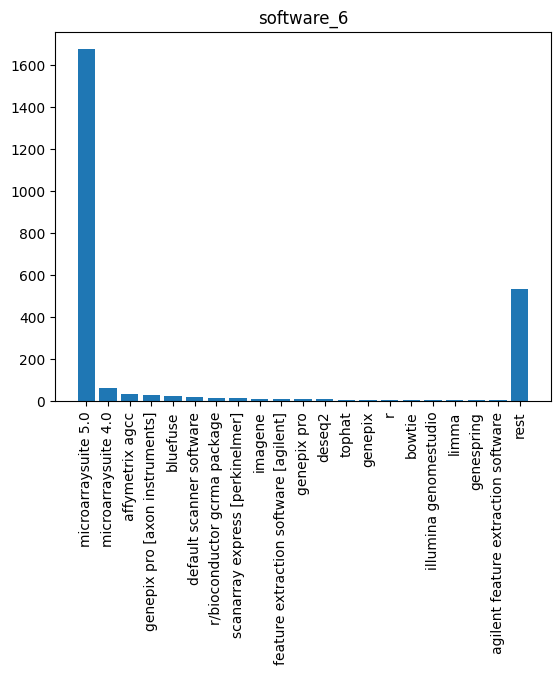

Field name: software_6
Select values: [('microarraysuite 5.0', 1676), ('genepix', 8), ('affymetrix whole transcript', 5), ('nanodrop 3.0.1 (nanodrop technologies)', 4), ('genome studio', 3), ('initial microarray data processing (data filtering, local normalisation and quality control)', 2), ('htseq-count version 0.6.1', 2), ('burrow-wheeler aligner', 2), ('bwa version 0.7.8', 2), ('bbmap v38.73 clumpify.sh, star v2.7.3a', 1), ('tophat2 version 2.0.10  & bowtie version 2.1.0', 1), ('cutadapt, star', 1), ('feature extraction v11.5 (agilent technologies)', 1), ('star 2.5.2a', 1), ('agilent feature extraction 10.7.3.1', 1), ('bowtie version 0.12.7, and default parameters (langmead 2009)', 1), ('trimmomatic (v0.35)', 1), ('evolve (pamgene, netherlands)', 1), ('casava 1.6 suite', 1), ('tophat v 2.1.0', 1), ('fastqc, trimgalore!, samtools, star aligner, htseq, partek genomics suite', 1), ('bcl2fastq-1.8.3', 1), ('star v2.3.0e', 1), ('feature extraction', 1), ('bedtools, ucsc kent suite', 1), 

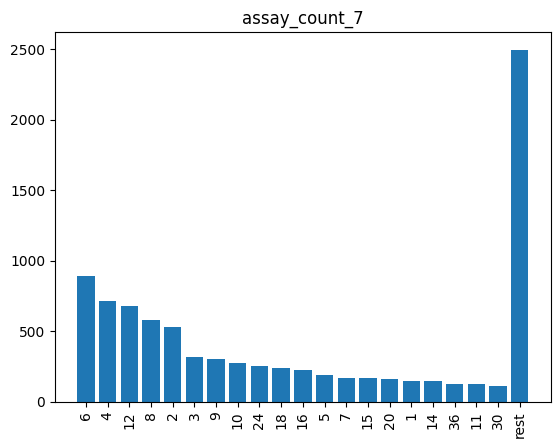

Field name: assay_count_7
Select values: [('6', 891), ('7', 169), ('21', 76), ('35', 32), ('47', 21), ('64', 15), ('76', 11), ('81', 9), ('111', 7), ('192', 6), ('116', 5), ('204', 4), ('145', 3), ('125', 3), ('410', 3), ('161', 2), ('275', 2), ('155', 2), ('121', 2), ('265', 1), ('380', 1), ('412', 1), ('289', 1), ('4113', 1), ('620', 1), ('683', 1), ('869', 1), ('147', 1), ('805', 1), ('717', 1)]
Number of values: 8853
number of datasets with this field:    8853
number of unique values:                357
dtype: int64
######################################################################################################################################################


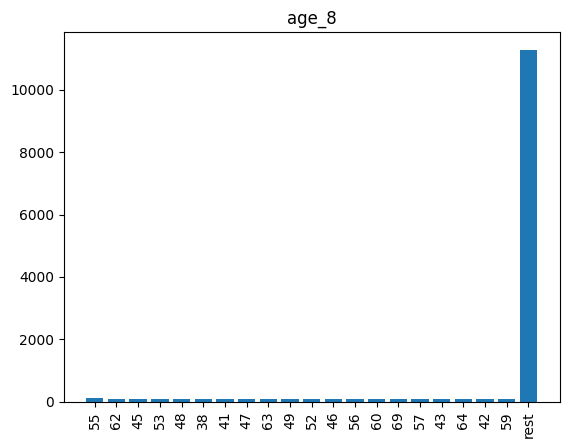

Field name: age_8
Select values: [('55', 107), ('81', 35), ('3 months', 15), ('38 years', 8), ('18 month', 5), ('7.7 years', 4), ('92', 3), ('... 35 other values', 2), ('24 hrs', 2), ('6 to 10', 2), ('50.8 year', 2), ('40 hour', 1), ('e17', 1), ('3 to 6', 1), ('51.52087611 years', 1), ('e3.5', 1), ('1 to 3', 1), ('... 133 other values', 1), ('57.3945205479452', 1), ('3wk', 1), ('-0.56 year', 1), ('3 yr old', 1), ('126 days', 1), ('0.33 to 21', 1), ('3 to 5 day', 1), ('28 month (old)', 1), ('87 day', 1), ('35 to 40', 1), ('15 y', 1), ('58 days', 1)]
Number of values: 12907
number of datasets with this field:    3051
number of unique values:               2846
dtype: int64
######################################################################################################################################################


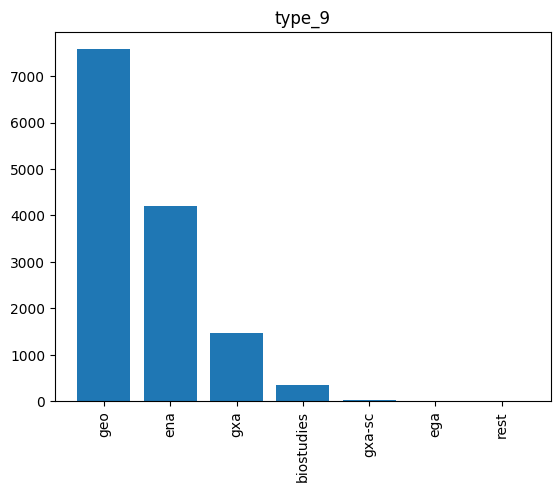

Field name: type_9
Select values: [('geo', 7577), ('ena', 4207), ('gxa', 1461), ('biostudies', 359), ('gxa-sc', 34), ('ega', 1)]
Number of values: 13639
number of datasets with this field:    12008
number of unique values:                   6
dtype: int64
######################################################################################################################################################


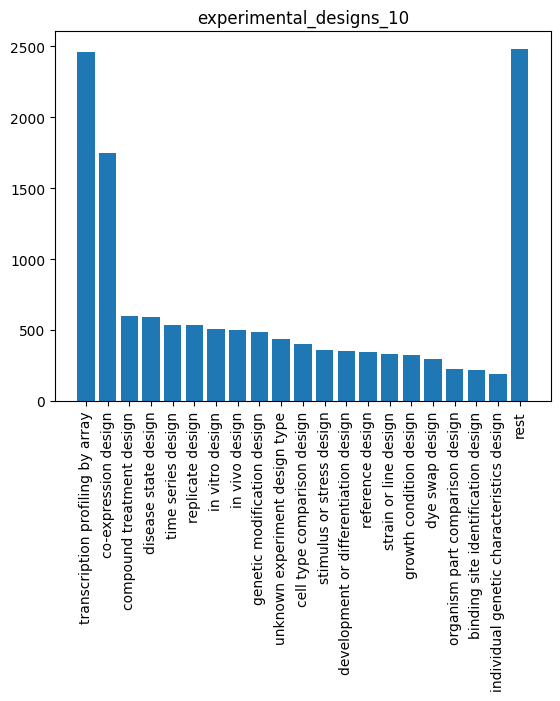

Field name: experimental_designs_10
Select values: [('transcription profiling by array', 2463), ('genetic modification design', 488), ('dye swap design', 293), ('case control design', 115), ('species design', 51), ('innate behavior design', 35), ('other', 27), ('normalization testing design', 18), ('self vs self design', 11), ('expression profiling', 5), ('imprinting design', 4), ('rna-seq of non coding rna', 3), ('transcription profiling by high throughput sequencing', 2), ('prganism part comparison design, time series design, growth condition design', 2), ('in vivo', 2), ('environmental stress', 1), ('behavioral design type', 1), ('disease state design, time series design, all pairs, dye swap design, co-expression design', 1), ('comaleparative genomalee hybridization design', 1), ('cell type comparision design', 1), ('stimulus or stress design, in vivo design, co-expression design', 1), ('behavior design', 1), ('development or differentiation design, genetic modification design, ex v

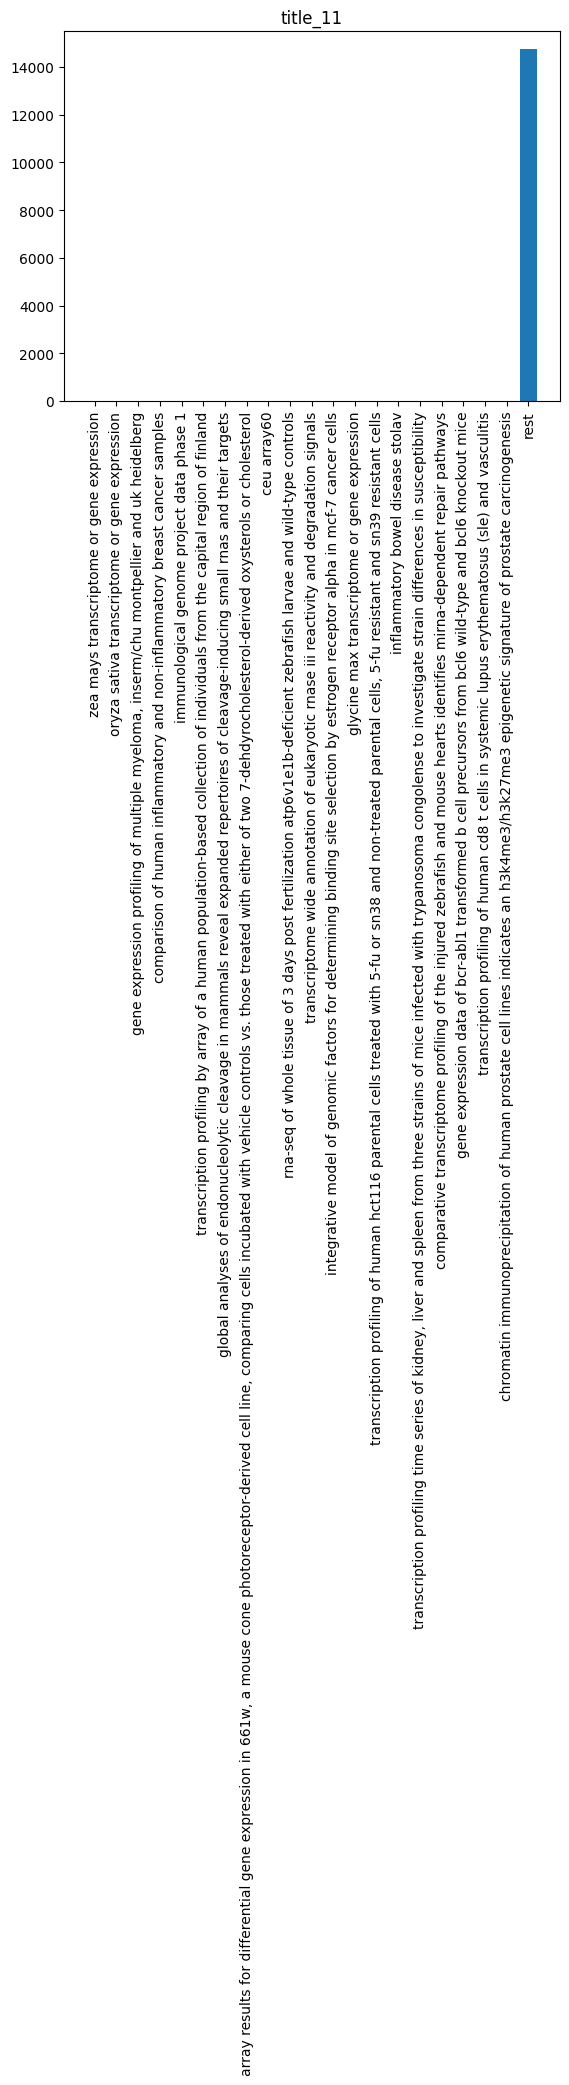

Field name: title_11
Select values: [('zea mays transcriptome or gene expression', 10), ('microrna profiling in mucosal biopsies of eosinophilic esophagitis patients pre and post glucocorticoid steroid treatment and relationship with mrna target expression', 1), ('smoking-induced wnt pathway downregulation', 1), ('role of swi/snf in acute leukemia maintenance and enhancer-mediated myc regulation', 1), ('4sudrb-seq: measuring transcription elongation and initiation genomewide', 1), ('cytokine-independent detection of antigen-specific germinal center t follicular helper (tfh) cells in immunized non-human primates using a live cell activation induced marker (aim) technique', 1), ('human corneal epithelial cells (htcepi) 6h treatment with 100nm vitamin d (1,25d3) vs. vehicle control', 1), ('core transcriptional regulatory circuit controlled by the tal1 complex in human t-cell acute lymphoblastic leukemia (subseries)', 1), ('the impact of a consortium of fermented milk strains on the gut mi

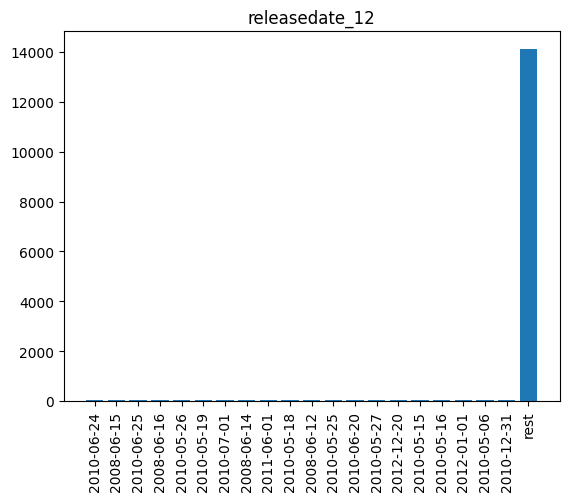

Field name: releasedate_12
Select values: [('2010-06-24', 60), ('2015-05-26', 15), ('2013-12-09', 11), ('2009-01-01', 10), ('2013-10-21', 8), ('2015-06-24', 7), ('2013-05-21', 7), ('2012-06-26', 6), ('2009-03-19', 5), ('2009-04-20', 5), ('2011-11-06', 5), ('2009-08-25', 4), ('2011-02-14', 4), ('2018-04-12', 3), ('2018-11-16', 3), ('2022-02-02', 3), ('2014-01-25', 2), ('2018-02-01', 2), ('2009-11-19', 2), ('2015-05-06', 2), ('2014-12-19', 2), ('2007-01-31', 1), ('2013-07-27', 1), ('2012-03-25', 1), ('2013-07-29', 1), ('2007-11-02', 1), ('2018-11-09', 1), ('2008-06-05', 1), ('2009-05-22', 1), ('2016-09-03', 1)]
Number of values: 14844
number of datasets with this field:    14844
number of unique values:                3427
dtype: int64
######################################################################################################################################################


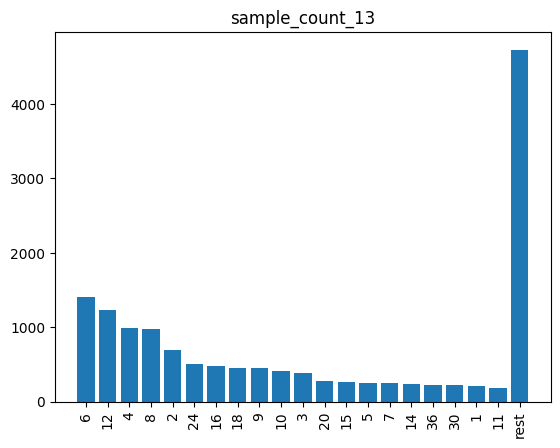

Field name: sample_count_13
Select values: [('6', 1399), ('30', 227), ('72', 70), ('54', 43), ('55', 25), ('86', 15), ('160', 12), ('152', 9), ('180', 7), ('286', 6), ('164', 5), ('193', 4), ('189', 3), ('296', 3), ('1024', 3), ('446', 2), ('163', 2), ('496', 2), ('269', 2), ('541', 1), ('434', 1), ('695', 1), ('623', 1), ('324', 1), ('7598', 1), ('2554', 1), ('1218', 1), ('823', 1), ('886', 1)]
Number of values: 14844
number of datasets with this field:    14844
number of unique values:                 480
dtype: int64
######################################################################################################################################################


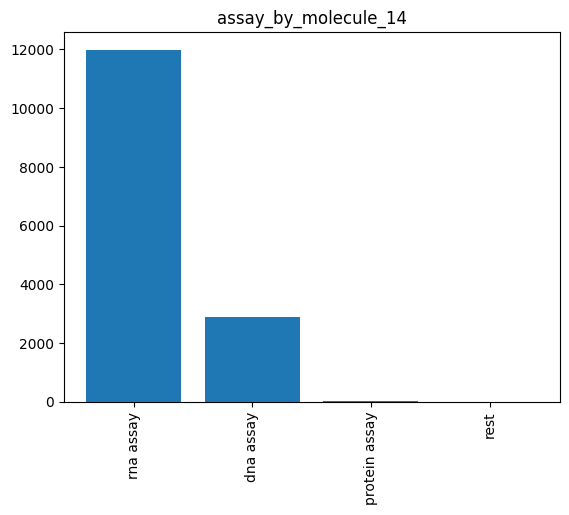

Field name: assay_by_molecule_14
Select values: [('rna assay', 11991), ('dna assay', 2882), ('protein assay', 39)]
Number of values: 14912
number of datasets with this field:    14344
number of unique values:                   3
dtype: int64
######################################################################################################################################################


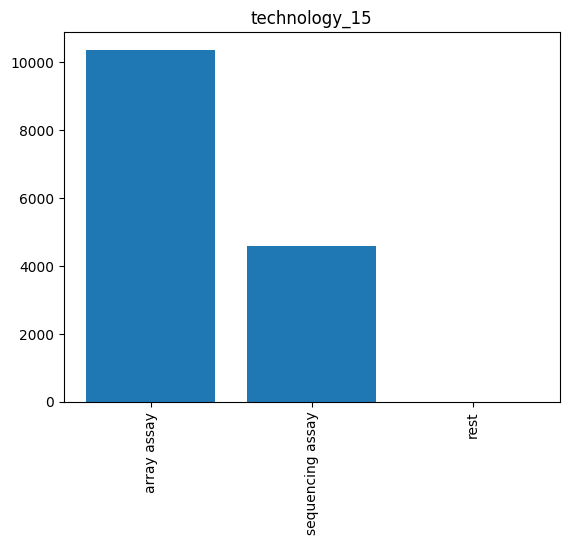

Field name: technology_15
Select values: [('array assay', 10371), ('sequencing assay', 4594)]
Number of values: 14965
number of datasets with this field:    14783
number of unique values:                   2
dtype: int64
######################################################################################################################################################


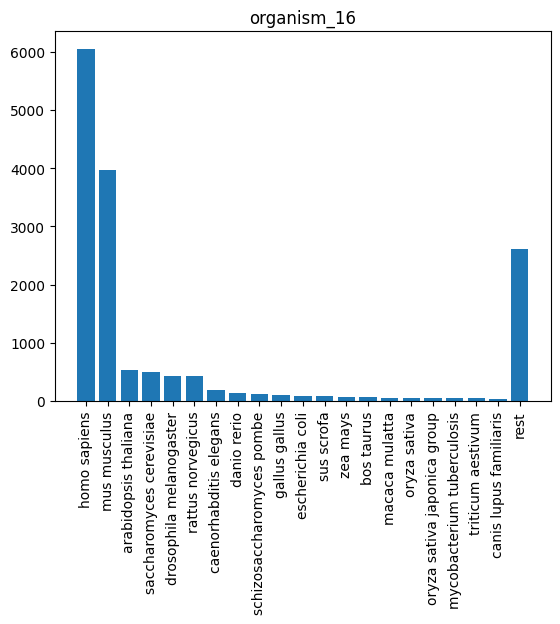

Field name: organism_16
Select values: [('homo sapiens', 6049), ('ovis aries', 21), ('canis familiaris', 10), ('plasmodium falciparum 3d7', 7), ('thermus thermophilus hb8', 5), ('pseudomonas putida', 4), ('olea europaea', 3), ('burkholderia cepacia', 3), ('legionella pneumophila', 2), ('arabidopsis suecica', 2), ('saccharomyces cerevisiae x saccharomyces paradoxus', 2), ('fusarium graminearum', 2), ('populus tremula x populus alba', 2), ('bacillus halodurans', 1), ('tigriopus californicus', 1), ('influenza a virus', 1), ('cyanidioschyzon merolae', 1), ('isochrysis galbana', 1), ('saccharomyces mikatae ifo 1815', 1), ('calyptogena magnifica symbiont', 1), ('petunia x hybrida', 1), ('oncorhynchus nerka', 1), ('anas platyrhynchos', 1), ('saimiri boliviensis', 1), ('lactobacillus iatae', 1), ('escherichia coli str. k-12 substr. mg1657', 1), ('bean pod mottle virus', 1), ('agrobacterium larrymoorei', 1), ('zymomonas mobilis subsp. mobilis zm4 = atcc 31821', 1), ('candidatus pelagibacter ubi

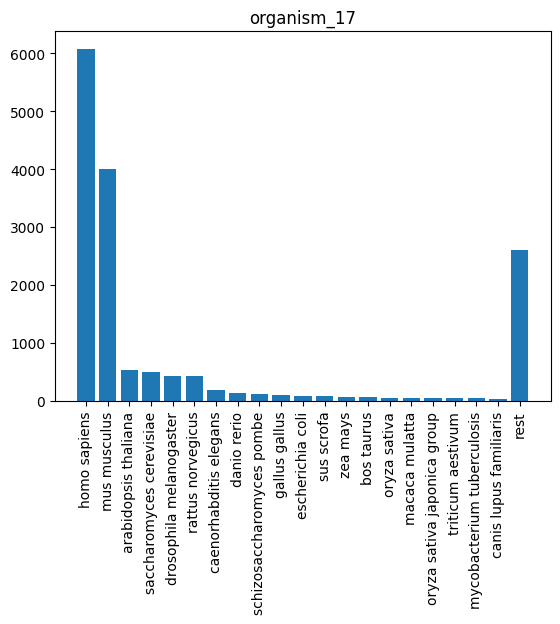

Field name: organism_17
Select values: [('homo sapiens', 6071), ('pseudomonas aeruginosa', 22), ('leishmania major', 10), ('enterococcus faecium', 7), ('tetranychus urticae', 5), ('thermotoga maritima msb8', 4), ('brassica oleracea', 3), ('pongo pygmaeus pygmaeus', 3), ('artificial sequences', 2), ('pyropia yezoensis', 2), ('caenorhabditis briggsae', 2), ('clostridium thermocellum atcc 27405', 2), ('myzus persicae', 2), ('symphysodon aequifasciata', 1), ('uncultured organism', 1), ('equus asinus x caballus', 1), ('shoot metagenome', 1), ('bifidobacterium bifidum', 1), ('saccharomyces paradoxus nrrl y-17217', 1), ('shewanella oneidensis mr-1', 1), ('vanessa cardui', 1), ('streptococcus pyogenes mgas5005', 1), ('beauveria bassiana', 1), ('mycobacterium tuberculosis variant bovis bcg str. pasteur 1173p2', 1), ('lactobacillus gasseri', 1), ('theileria parva', 1), ('bean pod mottle virus', 1), ('seed metagenome', 1), ('staphylococcus aureus subsp. aureus usa300 fpr3757', 1), ('candidatus pe

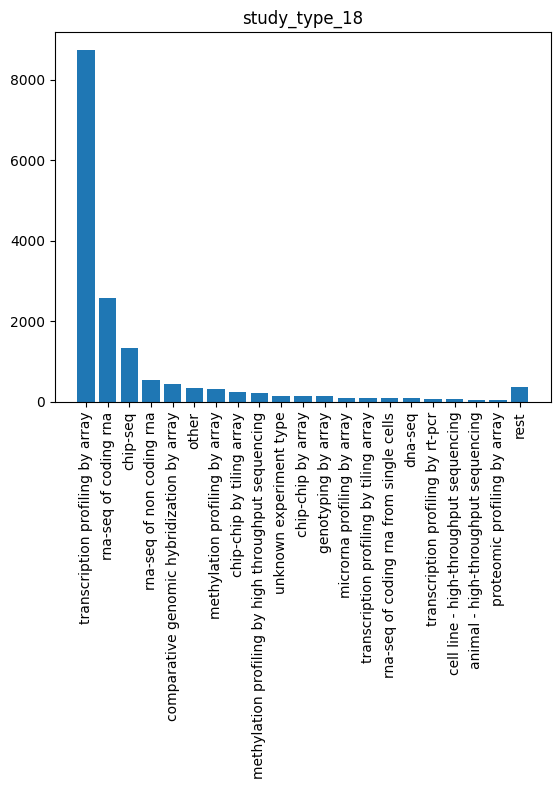

Field name: study_type_18
Select values: [('transcription profiling by array', 8735), ('rna-seq of non coding rna', 533), ('methylation profiling by array', 326), ('unknown experiment type', 157), ('microrna profiling by array', 108), ('dna-seq', 89), ('animal - high-throughput sequencing', 39), ('high-throughput sequencing', 24), ('rnai profiling by array', 17), ('human - high-throughput sequencing', 15), ('differential', 13), ('human - one-color microarray', 10), ('one-color microarray', 9), ('animal - single-cell sequencing', 7), ('cell line - single-cell sequencing', 6), ('trajectory', 5), ('scatac-seq', 4), ('bisulfite-seq', 4), ('human - two-color microarray', 3), ('proteomic profiling by mass spectrometer', 3), ('transcription profiling by array, chip-chip by array', 2), ('ribo-seq', 1), ('spatial transcriptomics by high-throughput sequencing', 1), ('gro-seq', 1)]
Number of values: 16183
number of datasets with this field:    14797
number of unique values:                  70
nu

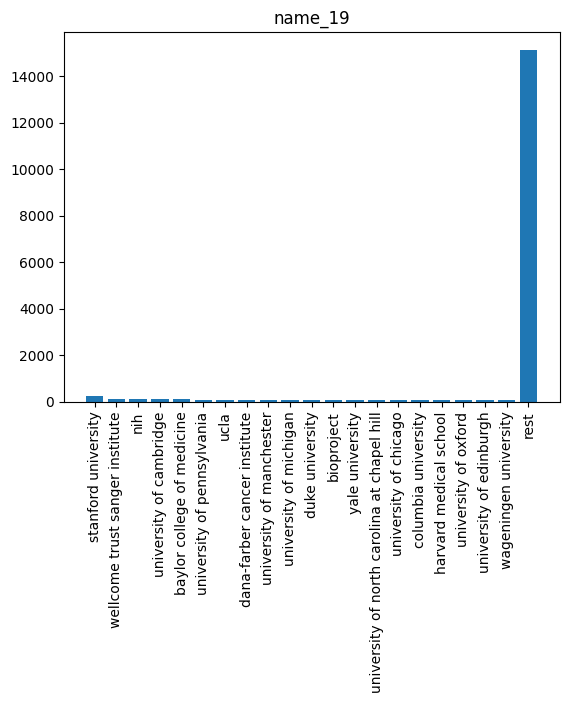

Field name: name_19
Select values: [('stanford university', 235), ('university of california, berkeley', 16), ('unc-chapel hill', 9), ('peter maccallum cancer centre', 6), ('wageningen ur', 5), ('max-planck institue for heart and lung research', 4), ('the university of leeds', 3), ('leia foundation, research & development center', 3), ('linkoping university', 3), ('biogenidec', 2), ('bcm', 2), ('tno quality of life, zeist, the netherlands', 2), ('international university bremen', 2), ('institute for molecular biosciences, biocenter', 2), ('usda-ars usmarc', 1), ('u. s. fda, cder', 1), ('department of molecular sciences, institute of clinical sciences, faculty of medicine, imperial college london and mrc clinical sciences centre, hammersmith hospital campus, london, w12 0nn, uk', 1), ('university of minho', 1), ('translational genomics unit, department of oncology, mario negri research institute', 1), ('cnrs-amu', 1), ('department of life sciences, imperial college london', 1), ('califo

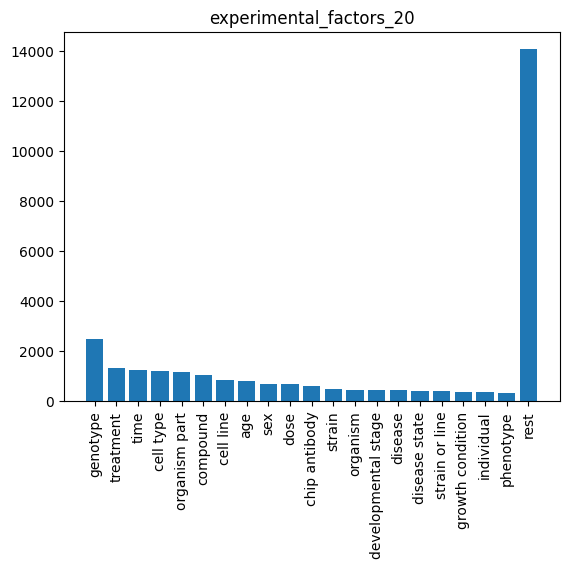

Field name: experimental_factors_20
Select values: [('genotype', 2502), ('experiment', 16), ('overallsurvival', 6), ('atcc number', 4), ('position along eigenstrat axis 1 (ethnicity correction)', 3), ('cell/tissue type', 3), ('exposuretime', 2), ('recurrence free survival (years)', 2), ('cell line derived from gem model of prostate cancer', 2), ('length', 2), ('days of water stress transient', 1), ('batch/replicate', 1), ('receptor status', 1), ('length of infection days', 1), ('clinicalinformation-cgh group hgg prediction', 1), ('cultures', 1), ('eventprogression', 1), ('processing date', 1), ('biopsysite', 1), ('host stage', 1), ('life cycle', 1), ('rfs event 0=no relapse, 1=relapsed at any site or died of disease', 1), ('first or second vaccination, 14 day interval', 1), ('weight of protein recovered', 1), ('ipsc group', 1), ('cin and tumour stage', 1), ('litterid', 1), ('erg group', 1), ('microarray barcode', 1), ('days post-lif', 1)]
Number of values: 29857
number of datasets with

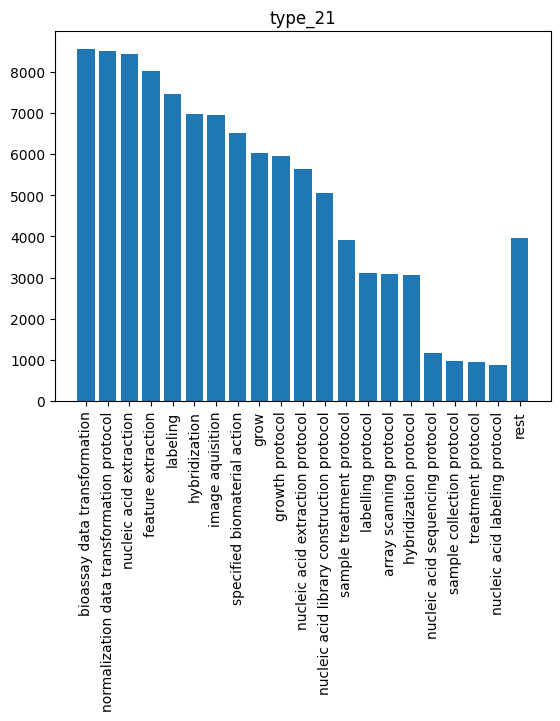

Field name: type_21
Select values: [('bioassay data transformation', 8559), ('grow', 6017), ('nucleic acid sequencing protocol', 1167), ('pool', 297), ('compound based treatment', 35), ('chip', 19), ('sampling', 13), ('data processing', 9), ('store', 6), ('cdna library construction protocol', 5), ('bioassay data trasformation', 4), ('uv crosslinking', 3), ('mean log normalization', 2), ('normalisation and data transformation protocol', 2), ('cel file generation', 2), ('alignment', 2), ('cell purification', 2), ('rna', 1), ('collection protocol', 1), ('red jungle fowl or white leghorn breed', 1), ('normalization data', 1), ('cdna labeling', 1), ('array scanning', 1), ('flow cytometry', 1), ('mirna extraction protocol', 1), ('lowess normalization', 1), ('carassius carassius sampling', 1), ('sample treatment', 1), ('rnalater preservation', 1), ('bioassasy data transformation', 1)]
Number of values: 105207
number of datasets with this field:    14751
number of unique values:               

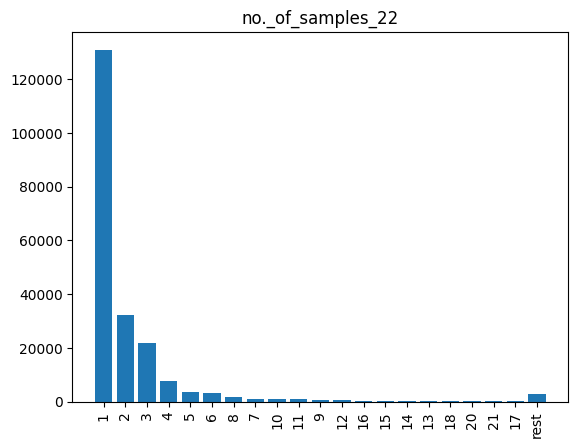

Field name: no._of_samples_22
Select values: [('1', 130938), ('9', 769), ('24', 142), ('96', 63), ('41', 37), ('45', 24), ('55', 17), ('69', 14), ('99', 10), ('76', 8), ('98', 6), ('143', 5), ('126', 4), ('672', 3), ('97', 3), ('149', 2), ('195', 2), ('107', 2), ('134', 2), ('293', 2), ('141', 1), ('335', 1), ('417', 1), ('255', 1), ('349', 1), ('262', 1), ('2880', 1), ('224', 1), ('189', 1)]
Number of values: 209877
number of datasets with this field:    11833
number of unique values:                 284
dtype: int64
######################################################################################################################################################


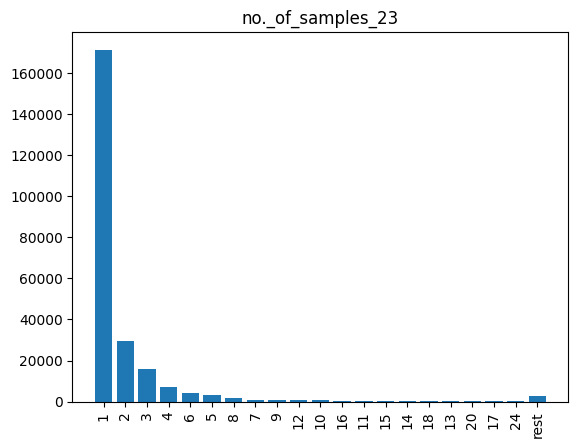

Field name: no._of_samples_23
Select values: [('1', 171369), ('10', 846), ('21', 165), ('27', 68), ('31', 41), ('49', 26), ('47', 19), ('82', 13), ('78', 9), ('88', 7), ('161', 6), ('103', 4), ('292', 3), ('109', 3), ('129', 3), ('163', 2), ('158', 2), ('123', 2), ('186', 2), ('427', 2), ('133', 1), ('164', 1), ('184', 1), ('132', 1), ('190', 1), ('269', 1), ('956', 1), ('351', 1)]
Number of values: 242150
number of datasets with this field:    11182
number of unique values:                 279
dtype: int64
######################################################################################################################################################


In [7]:

for field in dfs:
    df = dfs[field]
    commons = Counter(df["value"]).most_common(20)
    commons = {t[0]:t[1] for t in commons}
    commons["rest"] = len(df)-sum(commons.values())
    plt.bar(commons.keys(), commons.values())
    plt.xticks(rotation=90)
    plt.title(label=field)

    plt.show()

    commons = Counter(df["value"]).most_common()
    f = len(commons)//30+1

    print("Field name:", field)
    print("Select values:", commons[::f])
    print("Number of values:", len(df))
    print(df.rename(columns={
            "id":"number of datasets with this field:",
            "value":"number of unique values:",
            "ont": "number of ontologies refered:",
            "ont_term":"number of unique ontology terms:"
            }).nunique())
    print("###"*50)


# print values for literals

In [19]:
print("values = dict(")
for field in [
    #'sex_2',
    'hardware_4',
    'organism_part_5',
    'experimental_designs_10',
    'assay_by_molecule_14',
    'study_type_18',
    #'experimental_factors_20',
    #'type_21',
    #'adjusted_type_24'
    ]:
    df = dfs[field]
    commons = Counter(df["value"]).most_common()
    commons = [c[0] for c in commons]
    print(f"    {field} = dict(")
    print(f"        _25=", commons[:25],",")
    print(f"        _50=", commons[25:50],",")
    print(f"        _100=", commons[50:100],",")
    print(f"        _200=", commons[100:200],",")
    #print(f"        _400=", commons[200:400],",")
    print("    ),")
print(")")



values = dict(
    hardware_4 = dict(
        _25= ['illumina hiseq 2000', 'illumina hiseq 2500', 'illumina genome analyzer ii', 'nextseq 500', 'illumina genome analyzer iix', 'illumina hiseq 4000', 'illumina novaseq 6000', 'illumina miseq', 'affymetrix genechip scanner 3000 7g', 'ab solid 4 system', 'illumina hiseq 1500', 'illumina genome analyzer', 'illumina hiseq 1000', 'scanning hardware', 'genepix 4000b [axon instruments]', 'illumina hiseq 3000', 'axon genepix 4000b scanning hardware', 'nextseq 550', 'axon- genepix4000b', 'spectronic helios alpha uv-vis spectrophotometer', 'illumina hiscansq', '418 [affymetrix]', '454 gs flx+', 'hiseq x ten', 'agilent high resolution c scanner'] ,
        _50= ['ab solid system 3.0', 'g2565ba dna microarray scanner [agilent]', 'genepix 4000a [axon instruments]', 'ion torrent proton', 'scanarray express ht', 'affymetrix whole transcript', 'illumina hiseq', '454 gs flx', 'ion torrent pgm', 'genepix personal 4100a [axon instruments]', 'do not apply',

# another distribution visualizing method
number of labels as fnc of number of different labels

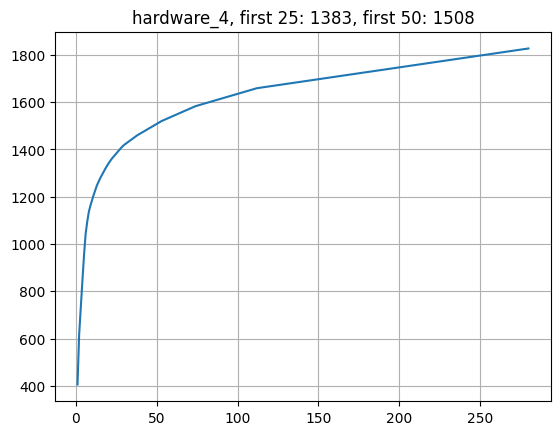

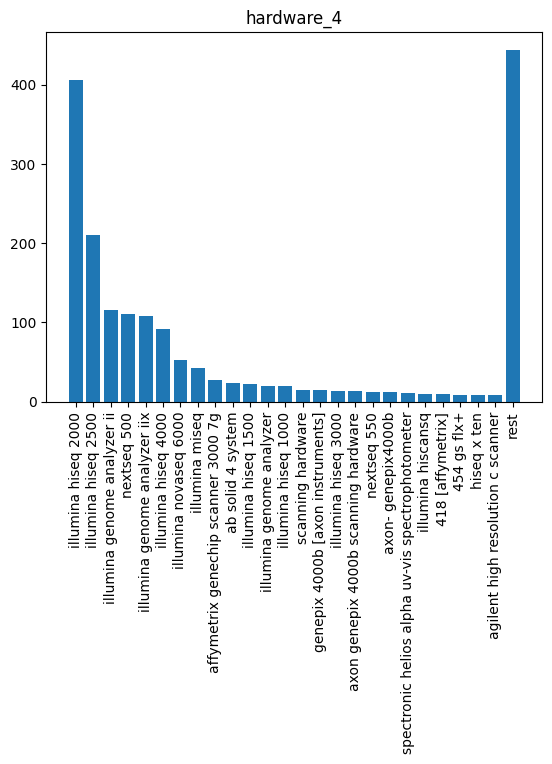

Field name: hardware_4
Select values: [('illumina hiseq 2000', 406), ('illumina hiseq 1500', 22), ('illumina hiscansq', 10), ('affymetrix whole transcript', 5), ('-', 4), ('chemostat', 4), ('ribozero', 3), ('genepix 4000b', 3), ('10x machine', 2), ('other', 2), ('agilent�s microarray hybridization oven', 2), ('gene titan', 2), ('10x genomics chromium', 1), ('agilent dna microarray scanner g2565ca', 1), ('low input quick amp labeling kit (agilent technologies), nd-1000 spectrophotometer (nanodrop technologies), bioanalyser system (agilent technologies)', 1), ('sonifier', 1), ('iridis 4 high performance computing cluster', 1), ('illumina bead array reader', 1), ('wild m8 zoom stereomicroscope (wild heerbrugg, switzerland)', 1), ('the genechip instrument system', 1), ('(make:affymetrix scanner,model:)', 1), ('eppendorf epmotion 5073m pipetting robot', 1), ('genepix 4000b scanner', 1), ('bgiseq-500', 1), ('affymetrix hybridisation oven', 1), ('generation iii array scanner [amersham]', 1), 

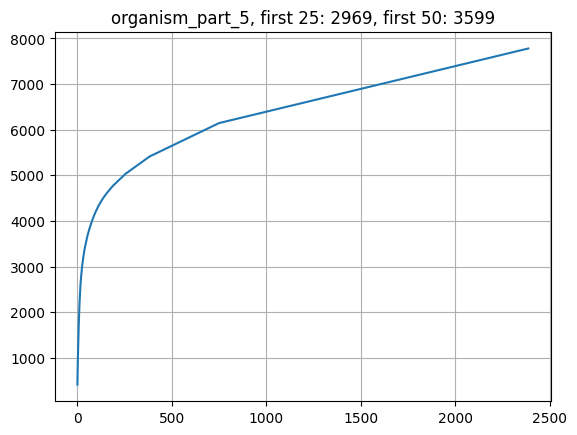

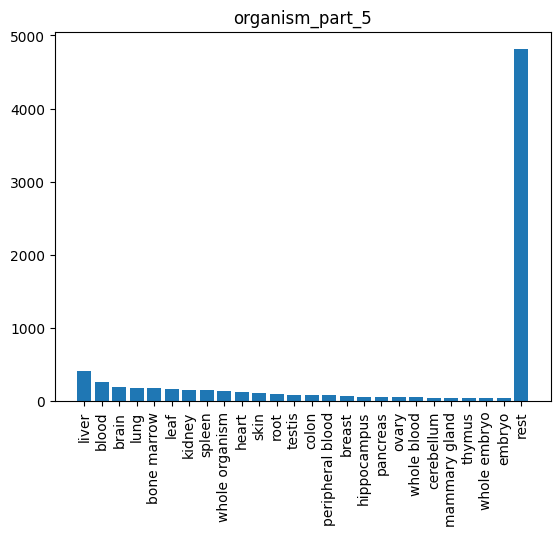

Field name: organism_part_5
Select values: [('liver', 415), ('seedling', 12), ('medial prefrontal cortex', 5), ('cerebellar cortex', 4), ('brain occipital', 3), ('vermiform appendix', 2), ('endocervix', 2), ('vegetative mycelium', 2), ('biliary system', 2), ('mouse tumorgraft from metastasis, cohort 1', 2), ('tricep muscle', 1), ('cribriform tumor', 1), ('prefrontal cortex area 9', 1), ('peripheral serum', 1), ('normal kidney', 1), ('normal renal cortex', 1), ('potato tuber 3rd stage (pt3)', 1), ('chorion', 1), ('er+ breast cancer primary tumor', 1), ('human pancreatic tumor', 1), ('young spikelets with the phase 7-9 at the middle of main panicles', 1), ('principal and basal cells of epididymis', 1), ('non-gut tissues (everything minus gut)', 1), ('uninvolved mammary tissue', 1), ('egg chamber', 1), ('fibroblast', 1), ('metastasis biopsy, liver', 1), ('endometrioma ectopic', 1), ('mix of heart, liver, spleen, kidney, brain', 1), ('silique fruit', 1)]
Number of values: 7781
number of da

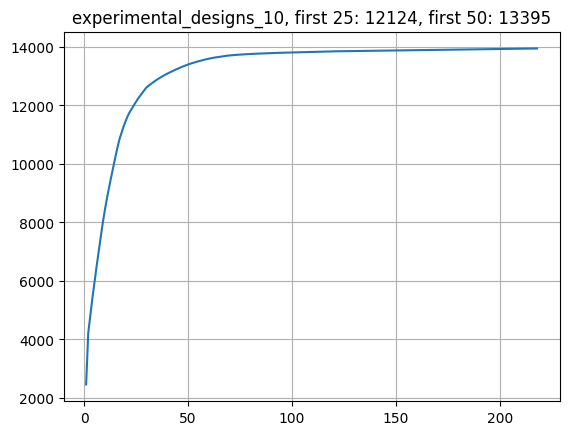

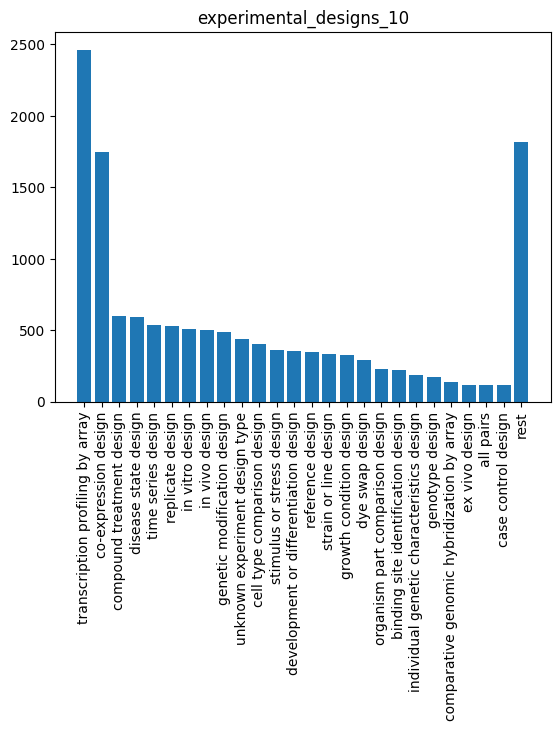

Field name: experimental_designs_10
Select values: [('transcription profiling by array', 2463), ('genetic modification design', 488), ('dye swap design', 293), ('case control design', 115), ('species design', 51), ('innate behavior design', 35), ('other', 27), ('normalization testing design', 18), ('self vs self design', 11), ('expression profiling', 5), ('imprinting design', 4), ('rna-seq of non coding rna', 3), ('transcription profiling by high throughput sequencing', 2), ('prganism part comparison design, time series design, growth condition design', 2), ('in vivo', 2), ('environmental stress', 1), ('behavioral design type', 1), ('disease state design, time series design, all pairs, dye swap design, co-expression design', 1), ('comaleparative genomalee hybridization design', 1), ('cell type comparision design', 1), ('stimulus or stress design, in vivo design, co-expression design', 1), ('behavior design', 1), ('development or differentiation design, genetic modification design, ex v

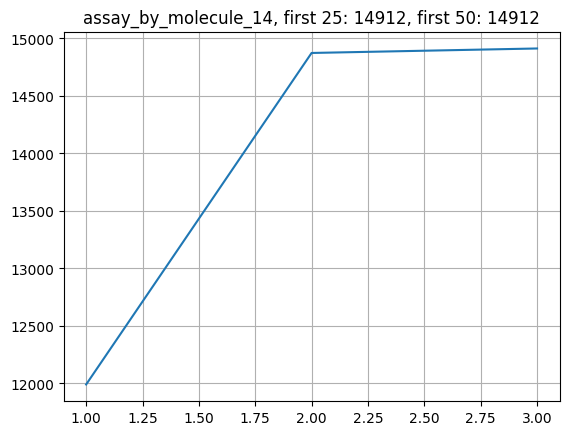

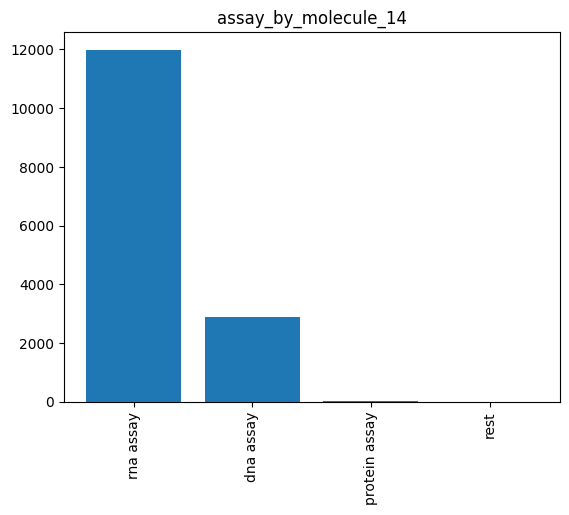

Field name: assay_by_molecule_14
Select values: [('rna assay', 11991), ('dna assay', 2882), ('protein assay', 39)]
Number of values: 14912
number of datasets with this field:    14344
number of unique values:                   3
dtype: int64
######################################################################################################################################################


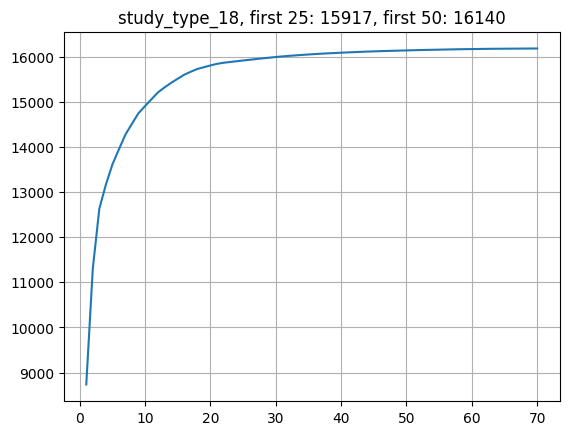

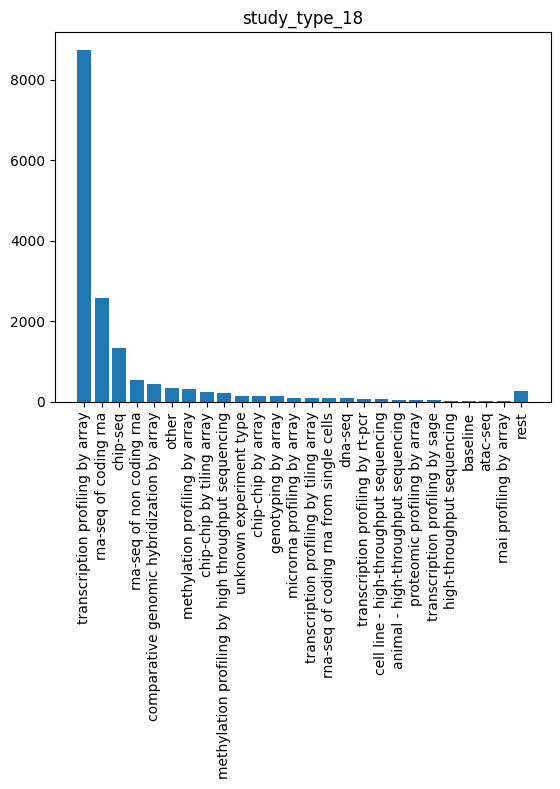

Field name: study_type_18
Select values: [('transcription profiling by array', 8735), ('rna-seq of non coding rna', 533), ('methylation profiling by array', 326), ('unknown experiment type', 157), ('microrna profiling by array', 108), ('dna-seq', 89), ('animal - high-throughput sequencing', 39), ('high-throughput sequencing', 24), ('rnai profiling by array', 17), ('human - high-throughput sequencing', 15), ('differential', 13), ('human - one-color microarray', 10), ('one-color microarray', 9), ('animal - single-cell sequencing', 7), ('cell line - single-cell sequencing', 6), ('trajectory', 5), ('scatac-seq', 4), ('bisulfite-seq', 4), ('human - two-color microarray', 3), ('proteomic profiling by mass spectrometer', 3), ('transcription profiling by array, chip-chip by array', 2), ('ribo-seq', 1), ('spatial transcriptomics by high-throughput sequencing', 1), ('gro-seq', 1)]
Number of values: 16183
number of datasets with this field:    14797
number of unique values:                  70
nu

In [18]:

for field in [
    #'sex_2',
    'hardware_4',
    'organism_part_5',
    'experimental_designs_10',
    'assay_by_molecule_14',
    'study_type_18',
    #'experimental_factors_20',
    #'type_21',
    #'adjusted_type_24'
    ]:

    df = dfs[field]

    commons = Counter(df["value"]).most_common()

    x = []
    y = []
    accumulative_count = 0
    i = 1
    for name, number in commons:
        accumulative_count += number
        x.append(i)
        y.append(accumulative_count)
        i += 1
    
    plt.plot(x,y)
    plt.grid()
    plt.title(label=field+f", first 25: {y[min(len(y)-1, 24)]}"+f", first 50: {y[min(len(y)-1, 49)]}")
    #plt.xlim(0,250)
    plt.show()

    df = dfs[field]
    commons = Counter(df["value"]).most_common(25)
    commons = {t[0]:t[1] for t in commons}
    commons["rest"] = len(df)-sum(commons.values())
    plt.bar(commons.keys(), commons.values())
    plt.xticks(rotation=90)
    plt.title(label=field)

    plt.show()

    commons = Counter(df["value"]).most_common()
    f = len(commons)//30+1

    print("Field name:", field)
    print("Select values:", commons[::f])
    print("Number of values:", len(df))
    print(df.rename(columns={
            "id":"number of datasets with this field:",
            "value":"number of unique values:",
            "ont": "number of ontologies refered:",
            "ont_term":"number of unique ontology terms:"
            }).nunique())
    print("###"*50)



# ontology fields

In [11]:

for field in dfs:
    df = dfs[field]


    if len(df.columns) > 2:
        print("Field name:", field)
        print("Number of values:", len(df))
        print(df.dropna(subset="ont_term").rename(columns={
                "id":"number of datasets with ontology term:",
                "value":"number of unique values with ontology term:",
                "ont": "number of ontologies refered:",
                "ont_term":"number of unique ontology terms:"
                }).nunique())
        print(df.dropna(subset="ont_term").drop("id", axis=1).drop_duplicates(subset = ["value", "ont_term"]))


Field name: experimental_designs_10
Number of values: 13944
number of datasets with ontology term:         28
number of unique values with ontology term:    15
number of ontologies refered:                   1
number of unique ontology terms:               17
dtype: int64
                                       value  ont     ont_term
1040                   strain or line design  efo  efo_0001754
1227               stimulus or stress design  efo  efo:0001762
1745                 growth condition design  efo  efo:0001759
1971               compound treatment design  efo  efo:0001755
2553                   strain or line design  efo  efo:0001754
2554   development or differentiation design  efo  efo:0001746
2677                      time series design  efo  efo:0001779
3126                    disease state design  efo  efo:0001756
5199             cell type comparison design  efo  efo:0001745
5537                    pathogenicity design  efo  efo_0001761
5538                         genot

## not one-to-one relationship between value and ontology term

In [12]:
uniques_21 = dfs["type_21"].dropna(subset="ont_term").drop_duplicates(subset = ["value", "ont_term"])
uniques_21

,id,value,ont,ont_term
175,29304067___E-MTAB-5275,nucleic acid library construction protocol,efo,efo_0004184
176,29304067___E-MTAB-5275,nucleic acid sequencing protocol,efo,efo_0004170
177,29304067___E-MTAB-5275,nucleic acid extraction protocol,efo,efo_0002944
178,29304067___E-MTAB-5275,growth protocol,efo,efo_0003789
381,27863470___E-MTAB-5193,sample collection protocol,efo,efo_0005518
382,27863470___E-MTAB-5193,dissection protocol,efo,efo_0005519
385,27863470___E-MTAB-5193,normalization data transformation protocol,efo,efo_0003816
386,27863470___E-MTAB-5193,high throughput sequence alignment protocol,efo,efo_0004917
498,27471640___E-MTAB-4080,nucleic acid hybridization to array protocol,efo,efo_0003815
499,27471640___E-MTAB-4080,nucleic acid labeling protocol,efo,efo_0003813


In [13]:
# diferent ont_terms for same value
uniques_21[uniques_21["value"] == "growth protocol"]

,id,value,ont,ont_term
178,29304067___E-MTAB-5275,growth protocol,efo,efo_0003789
28870,25793500___E-MTAB-2970,growth protocol,efo,protocoltype\tefo\tnull\tgrowth protocol


In [14]:
# different value for same ont_term
uniques_21[uniques_21["ont_term"] == "efo_0003789"]

,id,value,ont,ont_term
178,29304067___E-MTAB-5275,growth protocol,efo,efo_0003789
55719,30567555___E-MTAB-5903,sample collection protocol,efo,efo_0003789


In [15]:
# ont_term specified with eiter ":" or "_"
pd.concat([
    uniques_21[uniques_21["ont_term"] == "efo_0003789"],
    uniques_21[uniques_21["ont_term"] == "efo:0003789"]
])
    


,id,value,ont,ont_term
178,29304067___E-MTAB-5275,growth protocol,efo,efo_0003789
55719,30567555___E-MTAB-5903,sample collection protocol,efo,efo_0003789
43461,30835057___E-MTAB-7577,growth,efo,efo:0003789


## plot distribution, like before, but only datasets with ontology terms

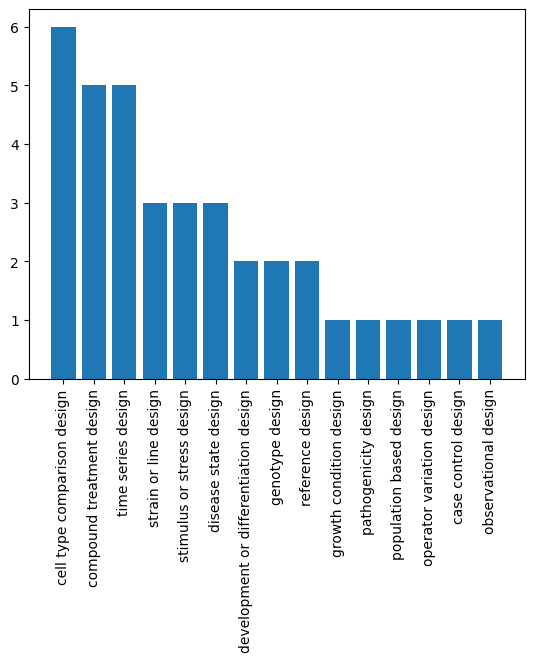

Field name: experimental_designs_10
ALL values [('cell type comparison design', 6), ('compound treatment design', 5), ('time series design', 5), ('strain or line design', 3), ('stimulus or stress design', 3), ('disease state design', 3), ('development or differentiation design', 2), ('genotype design', 2), ('reference design', 2), ('growth condition design', 1), ('pathogenicity design', 1), ('population based design', 1), ('operator variation design', 1), ('case control design', 1), ('observational design', 1)]
Number of values: 37
number of datasets with ontology term:         28
number of unique values with ontology term:    15
number of ontologies refered:                   1
number of unique ontology terms:               17
dtype: int64


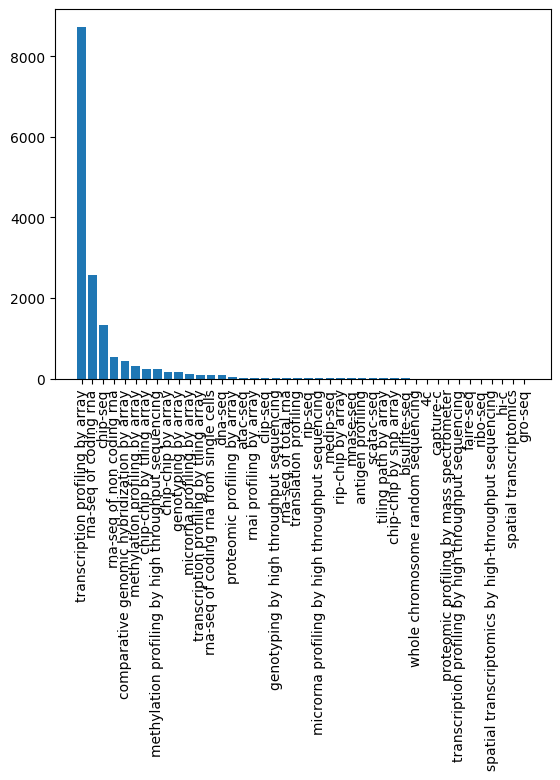

Field name: study_type_18
ALL values [('transcription profiling by array', 8732), ('rna-seq of coding rna', 2562), ('chip-seq', 1326), ('rna-seq of non coding rna', 532), ('comparative genomic hybridization by array', 447), ('methylation profiling by array', 326), ('chip-chip by tiling array', 241), ('methylation profiling by high throughput sequencing', 233), ('chip-chip by array', 154), ('genotyping by array', 153), ('microrna profiling by array', 108), ('transcription profiling by tiling array', 100), ('rna-seq of coding rna from single cells', 91), ('dna-seq', 89), ('proteomic profiling by array', 39), ('atac-seq', 17), ('rnai profiling by array', 17), ('clip-seq', 16), ('genotyping by high throughput sequencing', 15), ('rna-seq of total rna', 14), ('translation profiling', 12), ('rip-seq', 10), ('microrna profiling by high throughput sequencing', 9), ('medip-seq', 7), ('rip-chip by array', 6), ('mnase-seq', 4), ('antigen profiling', 4), ('scatac-seq', 4), ('tiling path by array', 

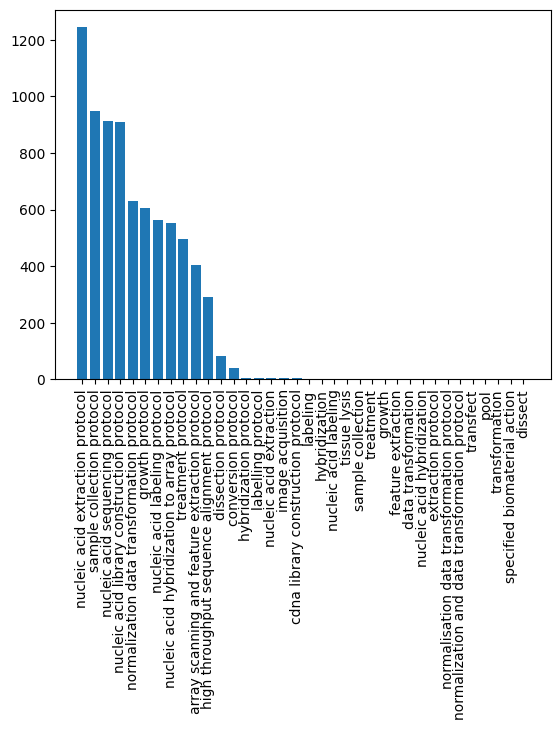

Field name: type_21
ALL values [('nucleic acid extraction protocol', 1244), ('sample collection protocol', 948), ('nucleic acid sequencing protocol', 914), ('nucleic acid library construction protocol', 908), ('normalization data transformation protocol', 630), ('growth protocol', 604), ('nucleic acid labeling protocol', 563), ('nucleic acid hybridization to array protocol', 554), ('treatment protocol', 496), ('array scanning and feature extraction protocol', 404), ('high throughput sequence alignment protocol', 290), ('dissection protocol', 83), ('conversion protocol', 39), ('hybridization protocol', 6), ('labelling protocol', 5), ('nucleic acid extraction', 4), ('image acquisition', 4), ('cdna library construction protocol', 3), ('labeling', 2), ('hybridization', 2), ('nucleic acid labeling', 2), ('tissue lysis', 2), ('sample collection', 2), ('treatment', 2), ('growth', 2), ('feature extraction', 2), ('data transformation', 2), ('nucleic acid hybridization', 2), ('extraction protoco

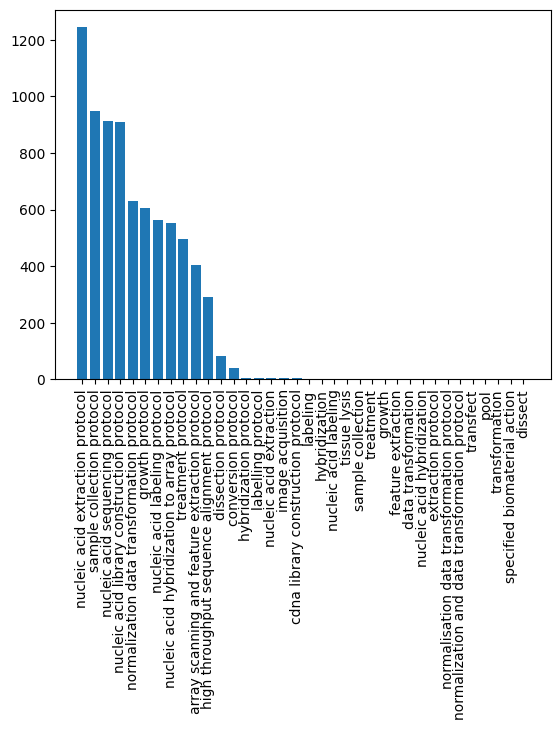

Field name: adjusted_type_24
ALL values [('nucleic acid extraction protocol', 1244), ('sample collection protocol', 948), ('nucleic acid sequencing protocol', 914), ('nucleic acid library construction protocol', 908), ('normalization data transformation protocol', 630), ('growth protocol', 604), ('nucleic acid labeling protocol', 563), ('nucleic acid hybridization to array protocol', 554), ('treatment protocol', 496), ('array scanning and feature extraction protocol', 404), ('high throughput sequence alignment protocol', 290), ('dissection protocol', 83), ('conversion protocol', 39), ('hybridization protocol', 6), ('labelling protocol', 5), ('nucleic acid extraction', 4), ('image acquisition', 4), ('cdna library construction protocol', 3), ('labeling', 2), ('hybridization', 2), ('nucleic acid labeling', 2), ('tissue lysis', 2), ('sample collection', 2), ('treatment', 2), ('growth', 2), ('feature extraction', 2), ('data transformation', 2), ('nucleic acid hybridization', 2), ('extractio

In [16]:

for field in dfs:
    if len(dfs[field].columns) > 2:

        df = dfs[field].dropna(subset="ont_term")
        commons = Counter(df["value"]).most_common(60)
        commons = {t[0]:t[1] for t in commons}
        #commons["rest"] = len(df)-sum(commons.values())
        plt.bar(commons.keys(), commons.values())
        plt.xticks(rotation=90)

        plt.show()

        commons = Counter(df["value"]).most_common()
        f = len(commons)//30+1

        print("Field name:", field)
        print("ALL values", commons)
        print("Number of values:", len(df))
        print(df.rename(columns={
                    "id":"number of datasets with ontology term:",
                    "value":"number of unique values with ontology term:",
                    "ont": "number of ontologies refered:",
                    "ont_term":"number of unique ontology terms:"
                }).nunique())


In [17]:
# print ont terms for use in the subtre_investigtion notebook

dfs["study_type_18"].dropna(subset="ont_term").drop_duplicates(subset = ["value", "ont_term"])["ont_term"].values


array(['efo_0002768', 'efo_0003751', 'efo_0002692', 'efo_0003738',
       'efo_0000749', 'efo_0003737', 'efo_0002759', 'efo_0002762',
       'efo_0002693', 'efo_0002761', 'efo_0002760', 'efo_0002767',
       'efo_0002765', 'efo_0004160', 'efo_0005684', 'efo_0002769',
       'efo_0000753', 'efo_0003749', 'efo_0007045', 'efo_0000747',
       'efo_0003143', 'efo_0001030', 'efo_0002896', 'efo_0007690',
       'efo_0010891', 'efo_0001033', 'efo_0008891', 'efo_0002771',
       'efo_0009653', 'efo_0005517', 'efo_0001031', 'efo_0007691',
       'efo_0005310', 'efo_0002770', 'efo_0002764', 'efo_0002766',
       'efo_0030005', 'efo_0003753', 'efo_0007693', 'efo_0008994',
       'efo_0004428', 'efo_0005227'], dtype=object)